# Project: Wrangling and Analyze Data

## Data Gathering

1. Import all required files

In [1]:
import os
import numpy as np
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
import time
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

2. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
# read into a dataFrame
archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using the requests library
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)
    
#read the image into a dataframe called image
image = pd.read_csv('image-predictions.tsv', sep= '\t')

3. Reading additional data via the Twitter API (tweet_json.txt)

In [4]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


# Tweet IDs 
tweet_ids = archive.tweet_id.values


count = 0
error_msg = {}

start = time.time() #To be used in elapsed_time calculation

# saving the tweets' data in the list to a text file in json formating
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive['tweet_id']:
            try:
                # Getting the tweet's data and append them to the jason list
                tweet = api.get_status(tweet_id, tweet_mode = 'extended')
                json.dump(tweet._json, file)
                file.write('\n')
            # save the error to the fail dictionary for review
            except tweepy.TweepError as error:   
                error_msg[tweet_id] = error
                print('Tweed id: {} error: {}'.format(tweet_id, error_msg[tweet_id]))
                continue
            count += 1
            # printing the loop counting     
            if count in (250, 750, 1500, 2200):
                print("loop {} ".format(count))
# printing the total number of errors 
print("The number of Errors:  {}\n".format(len(error_msg)))

# Printing the elapsed_time
end = time.time()
print("\nThe elapsed time = {}".format(end - start)) 



The number of Errors:  0


The elapsed time = 0.0009987354278564453


In [5]:
# Reading additional data via tweet_json.txt
tweets_data = []
with open('tweet-json.txt', 'r') as Json_file:
    for line in Json_file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        tweets_data.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'tweet_id' : tweet_id})
        
#saving the tweet-json.txt file into a dataframe called twitter_extra
df_api = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

## Assessing Data




From the data gathered above we can assess them both visually and programatically

#### Twitter Archive Data

Let's assess this data visually and programatically

In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [7]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
# Checking for duplicates
sum(archive.duplicated())

0

In [9]:
#Summary statistics of the data
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
#Value counts in the name column
archive['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [11]:
# Checking he numerator column value counts
archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [12]:
#Checking value counts of the ratings denominator column
archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [13]:
# Checking if there are duplicates in the expanded url columns
sum(archive['expanded_urls'].duplicated())

137

In [14]:
# Visually assess them on the dataframe 
archive[archive['expanded_urls'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


In [15]:
sum(archive['text'].isnull())

0

In [16]:
sum(archive['tweet_id'].duplicated())

0

#### Image Predictions  Data

Let's assess this data visually and programatically

In [17]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [19]:
# Value counts for P1
image['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [20]:
# Value counts for P2
image['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [21]:
# Value counts for P3
image['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [22]:
#Summary statistics of image dataframe
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [23]:
# Checking for duplicates
sum(image.duplicated())

0

####  Additional data from the JSON txt

Let's assess this data visually and programatically

In [24]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
df_api.sample(10)

,tweet_id,retweet_count,favorite_count
1217,714631576617938945,1122,3571
39,884562892145688576,5100,24765
88,875021211251597312,4922,26022
1694,681242418453299201,624,1645
2277,667405339315146752,234,489
128,867421006826221569,2697,16755
165,859924526012018688,4349,20021
121,869227993411051520,4023,21112
551,804413760345620481,3712,0
2001,672475084225949696,770,1529


In [26]:
# Summary statistics
df_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## Assessment Summary

### Tidiness Issues

* Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one colomn `dog_stage`. Solved

* Breed Predictions, Confidence intervals and Dog tests are spread in three columns.Solved

* The `df_api` (json_data) table need to merge into the `archive` table. Solved


### Quality Issues

#### archive table

* `name` column has missing and incorrect values, the dog names in the name column are all capitalized, so words that begin in lowercase are not a dogs' name. These include ("a", "the" and "an")etc. Solved

* There are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp". We will keep the rows that are null and remove the retweets.. Solved

* The data type for `timestamp` is string and it contains '+0000' string instead of a datetime format. Solved

* Optimize the `source` contents for human readability; change the long url links to source names. Solved

* The standard for `rating_denominator` is 10, but it includes some other numbers, which are incorrect. Solved

* The `rating_numerator` also has some incorrect values. Solved

* Rating numerator and denominator are separated. Solved

* Tweet_id fields in the three datasets are stored as int values and should be strings. Solved




#### image_predictions table

* The column names are not descriptive such as p1,p2.
* Remove tweets that don't have an image from the image table



## Cleaning Data
In this section, we will clean **all** of the issues we documented while assessing. 


In [27]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_clean = image.copy()
df_api_clean = df_api.copy()

### Tidiness Issue 1: Columns 'doggo', 'floofer', 'pupper', 'puppo' in twitter_archive should belong to one colomn dog_stage.

#### Definition

Create a column name dog_stage instead of (doggo, floofer, pupper, puppo) columns at archive dataframe.

#### Code

In [28]:
print(archive_clean.doggo.value_counts())
print(archive_clean.floofer.value_counts())
print(archive_clean.pupper.value_counts())
print(archive_clean.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


We can observe that there are some none values within

In [29]:
# Replace all the None values with an empty string
archive_clean.floofer = archive_clean.floofer.replace(['None'] ,[''], regex=True )
archive_clean.doggo = archive_clean.doggo.replace(['None'] ,[''], regex=True )
archive_clean.pupper = archive_clean.pupper.replace(['None'] ,[''], regex=True )
archive_clean.puppo = archive_clean.puppo.replace(['None'] ,[''], regex=True )

In [30]:
# Create a new column called "dog_stage"
archive_clean['dog_stage'] = archive_clean['doggo'] + archive_clean['puppo'] + archive_clean['floofer'] + archive_clean['pupper']

# Drop the four columns after you added them in one column.
archive_clean.drop(['doggo', 'puppo', 'floofer', 'pupper'], inplace=True, axis=1)

In [31]:
#solving the issue of the rows which contain multiple stages and add separator between the stages
archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'      
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'  

In [32]:
# use np.nan to fill the empty
archive_clean['dog_stage'] = archive_clean['dog_stage'].replace('', np.nan)

### Test

In [33]:
archive_clean.dog_stage.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer', 'doggo-puppo',
       'doggo-floofer', 'doggo-pupper'], dtype=object)

In [34]:
archive_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1436,697255105972801536,NaN,NaN,2016-02-10 03:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Charlie. He likes to kiss all the big mil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697255105...,10,10,Charlie,NaN
2207,668627278264475648,NaN,NaN,2015-11-23 03:09:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668627278...,9,10,Timofy,NaN
835,768193404517830656,NaN,NaN,2016-08-23 21:09:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerald. He's a fairly exotic doggo. Floof...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/768193404...,8,10,Gerald,doggo
301,836677758902222849,NaN,NaN,2017-02-28 20:41:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Oliver. He's pretty exotic. Fairl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/836677758...,11,10,Oliver,NaN
2156,669597912108789760,NaN,NaN,2015-11-25 19:25:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skye. He is a Bretwaldian Altostratus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669597912...,10,10,Skye,NaN


### Tidiness Issue 2: Breed Predictions, Confidence intervals and Dog tests are spread in three columns.

#### Definition

Create two new columns in image predictions dataframe called dog_breed and confidence by checking each dog breed prediction flag in order (p1_dog, p2_dog, p3_dog), and copying the breed with the highest confidence level into the new breed column.
Also, copy the associated confidence level into the new confidence column.
For cases where all 3 predictions are False (NOT a valid dog breed), dog_breed will be set as NAN and confidence to 0 and previous multiple columns will be dropped

#### Code

In [35]:
# the conditions for selection when it is a dog
conditions = [(image_clean['p1_dog'] == True),
              (image_clean['p2_dog'] == True),
              (image_clean['p3_dog'] == True)]

# the choice order based on the selection conditions for predicted breed
breeds = [image_clean['p1'], 
        image_clean['p2'],
        image_clean['p3']]

# the choice order for confidence level based on the selection conditions
confidence_level = [image_clean['p1_conf'], 
                    image_clean['p2_conf'], 
                    image_clean['p3_conf']]

# selecting the predicted dog breed based on the first successful condition and placing in new dog breed column
image_clean['dog_breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# selecting the predicted confidence level based on the first successful condition and placing into new confidence column
image_clean['confidence'] = np.select(conditions, confidence_level, 
                                            default = 0)

#droping previous prediction and confidence level columns


image_clean.drop(image_clean.iloc[:,3:12], inplace= True, axis=1)

In [36]:
#replace none as nan then drop them since they are not dogs
image_clean['dog_breed'].replace('none', np.NAN, inplace =True)

In [37]:
image_clean.dropna(axis= 0, subset='dog_breed', inplace= True)

#### Test

In [38]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   dog_breed   1751 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


In [39]:
image_clean.head()

,tweet_id,jpg_url,img_num,dog_breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311


### Tidiness issue 3: The df_api (json_data) table need to merge into the archive table

#### Define :

We can now meege the df_api table and the archive table together using inner join with twitter id

#### Code

In [40]:
# join two tables on 'tweet_id' and use inner join method
archive_clean = pd.merge(archive_clean, df_api, on='tweet_id', how = 'inner')

#### Test

In [41]:
# drop the duplicates due to join
archive_clean = archive_clean.drop_duplicates()

In [42]:
# Check
print(archive_clean.tweet_id.count())
print(df_api.tweet_id.count())

2354
2354


### Quality issue  1: name column has missing and incorrect values, the dog names in the name column are all capitalized, so words that begin in lowercase are not a dogs' name. These include ("a", "the" and "an")etc

#### Definition 

Replace lower letter words, 'a', 'an' and 'None' etc. in the 'name' column with the name in the 'text' column -if the text has a name- otherwise with NaN

#### Code

In [43]:
# Compile the pattrns
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
# Remove 'a' and 'an'
for index, row in archive_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern, row['text'])[0]
            archive_clean.loc[index,'name'] = archive_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        archive_clean.loc[index,'name'] = np.nan

In [44]:
# Change None Values in the name column to NaN
archive_clean['name'].replace('None', np.NAN, inplace =True)

#### Test

In [45]:
archive_clean.name.value_counts(dropna = False)

NaN           785
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Zoe             1
Stewie          1
Lilah           1
Spanky          1
Christoper      1
Name: name, Length: 973, dtype: int64

### Quality Issue 2 :  Remove Retweets and Replies

#### Definition 

There are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
"retweeted_status_timestamp". We will keep the rows that are null and remove the retweets.


#### Code

In [46]:
# there are 181 retweets, which can be seen in the 3 columns "retweeted_status_id", "retweeted_status_user_id" and 
# "retweeted_status_timestamp". We keep the rows that are null and remove the retweets.
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [47]:
# check retweets have gone
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        1455 non-null   object 
 13  dog_stage                   344 n

In [48]:
# delete the columns related to retweets from the master dataframe.
archive_clean = archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [49]:
# check the retweet columns have gone.
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   1455 non-null   object 
 10  dog_stage              344 non-null    object 
 11  retweet_count          2175 non-null   int64  
 12  favorite_count         2175 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 237.9+ KB


In [50]:
# the "in_reply_to_status_id" includes the original tweet_id if there is a reply. There are 78 replies.
# We keep the rows that are null and remove the replies.
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isnull()]

In [51]:
# check the replies have gone
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2097 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              2097 non-null   object 
 4   source                 2097 non-null   object 
 5   text                   2097 non-null   object 
 6   expanded_urls          2094 non-null   object 
 7   rating_numerator       2097 non-null   int64  
 8   rating_denominator     2097 non-null   int64  
 9   name                   1454 non-null   object 
 10  dog_stage              336 non-null    object 
 11  retweet_count          2097 non-null   int64  
 12  favorite_count         2097 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 229.4+ KB


In [52]:
# delete the columns related to replies from the master dataframe.
archive_clean = archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

#### Test

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                1454 non-null   object
 8   dog_stage           336 non-null    object
 9   retweet_count       2097 non-null   int64 
 10  favorite_count      2097 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 196.6+ KB


###  Quality Issue 3 :  Remove tweets that don't have an image from the image table

#### Definition:

After deleting the retweets and replies we still have 126 tweets without an image, as this was one of the project'srequirements we will delete the tweets without an image. 

#### Code

In [54]:
# Keep only rows with image
image_clean = image_clean[image_clean.jpg_url.notnull()]


#### Test 

In [55]:
# Check that we have an image for each tweet_id
image_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   dog_breed   1751 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


### Quality Issue 4: The data type for timestamp is string and it contains '+0000' string instead of a datetime format

#### Definition:

* Remove '+0000' string from the timestamp column
* Change the timestamp column to date/time

#### Code 

In [56]:
# Let us check the timestamp column unique values
archive_clean['timestamp'].unique()

array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

In [57]:
# Now extract time and date only 
archive_clean['timestamp'] = archive_clean['timestamp'].str[:-6]

In [58]:
# Check it out now
archive_clean['timestamp'].unique()

array(['2017-08-01 16:23:56', '2017-08-01 00:17:27',
       '2017-07-31 00:18:03', ..., '2015-11-15 23:21:54',
       '2015-11-15 23:05:30', '2015-11-15 22:32:08'], dtype=object)

In [59]:
# converting the timestamp column to date/time type
archive_clean.timestamp = pd.to_datetime(archive_clean['timestamp'])

#### Test

In [60]:
archive_clean['timestamp']

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
               ...        
2349   2015-11-16 00:24:50
2350   2015-11-16 00:04:52
2351   2015-11-15 23:21:54
2352   2015-11-15 23:05:30
2353   2015-11-15 22:32:08
Name: timestamp, Length: 2097, dtype: datetime64[ns]

### Quality Issue 5: Optimize the source contents for human readable; change the long url links to the source names.

#### Definition:

Optimize the source contents for readabilty; change the long url links to the source names.

#### Code

In [61]:
archive_clean['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1964
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

Four types of source: Twitter for iphone / Vine - Make a Scene / Twitter Web Client / TweetDeck

In [62]:
# Use re library with findall function and extract real source from tags
archive_clean['source'] = archive_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [63]:
# change the type of source to category for preparing later visualization
archive_clean['source'] = archive_clean['source'].astype('category')

#### Test

In [64]:
archive_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

###  Quality Issue 6:  The standard for rating_denominator is 10, but it includes some other numbers, which are incorrect.

#### Definition:

The standard for rating_denominator is 10, but it includes some other numbers, which are incorrect.

#### Code

In [65]:
# Value counts for rating denominator
archive_clean['rating_denominator'].value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [66]:
# filter the wrong rating_denominator values

df1 = archive_clean[archive_clean['rating_denominator'] != 10]

df1[['tweet_id','text','rating_numerator','rating_denominator']]

,tweet_id,text,rating_numerator,rating_denominator
432,820690176645140481,The floofs have been released I repeat the flo...,84,70
515,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
900,758467244762497024,Why does this never happen at my front door......,165,150
1066,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11
1118,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170
1163,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20
1200,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50
1226,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1252,710658690886586372,Here's a brigade of puppers. All look very pre...,80,80
1272,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro...",45,50


In [67]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

archive_clean.loc[archive_clean.tweet_id == 740373189193256964, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 682962037429899265, ['rating_denominator']] = 10
archive_clean.loc[archive_clean.tweet_id == 666287406224695296, ['rating_denominator']] = 10

#### Test

In [68]:
archive_clean.loc[archive_clean.tweet_id == 666287406224695296]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
2333,666287406224695296,2015-11-16 16:11:11,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,10,NaN,NaN,71,152


### Quality Issue 7:  The rating_numerator also has some incorrect values.

#### Definition:

Correct incorrect values in the rating_numerator column

#### Code

In [69]:
# tweet_id : 740373189193256964,722974582966214656,716439118184652801,682962037429899265,666287406224695296

archive_clean.loc[archive_clean.tweet_id == 740373189193256964, ['rating_numerator']] = 14
archive_clean.loc[archive_clean.tweet_id == 722974582966214656, ['rating_numerator']] = 13
archive_clean.loc[archive_clean.tweet_id == 716439118184652801, ['rating_numerator']] = 11
archive_clean.loc[archive_clean.tweet_id == 682962037429899265, ['rating_numerator']] = 10
archive_clean.loc[archive_clean.tweet_id == 666287406224695296, ['rating_numerator']] = 9

#### Test

In [70]:
archive_clean.loc[archive_clean.tweet_id == 682962037429899265]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count
1660,682962037429899265,2016-01-01 16:30:13,Twitter for iPhone,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,NaN,15043,26239


### Quality Issue  8 : Rating numerator and denominator are separated. 

#### Definition

Rating numerator and rating denominator should be together in a ratings column 

#### Code

In [71]:
#create rating column
archive_clean['rating'] = archive_clean['rating_numerator'].astype(str) + '/'+ archive_clean['rating_denominator'].astype(str)

In [72]:
#drop columns
archive_clean.drop(['rating_numerator', 'rating_denominator'], axis =1, inplace= True)

In [73]:
#dropping duplicates
archive_clean= archive_clean.drop_duplicates()

#### Test

In [74]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,name,dog_stage,retweet_count,favorite_count,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,8853,39467,13/10
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,6514,33819,13/10
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,4328,25461,12/10
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,8964,42908,13/10
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,9774,41048,12/10


### Quality Issue 9:  Tweet_id fields in the three datasets are stored as int values and should be strings

#### Definition:

Tweet_id fields should be changed from integers to strings

In [75]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
image_clean['tweet_id'] = image_clean['tweet_id'].astype(str)

#### Test

In [76]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2353
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        2097 non-null   object        
 1   timestamp       2097 non-null   datetime64[ns]
 2   source          2097 non-null   category      
 3   text            2097 non-null   object        
 4   expanded_urls   2094 non-null   object        
 5   name            1454 non-null   object        
 6   dog_stage       336 non-null    object        
 7   retweet_count   2097 non-null   int64         
 8   favorite_count  2097 non-null   int64         
 9   rating          2097 non-null   object        
dtypes: category(1), datetime64[ns](1), int64(2), object(6)
memory usage: 166.1+ KB


In [77]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   object 
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   dog_breed   1751 non-null   object 
 4   confidence  1751 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 82.1+ KB


### Now merge archive_clean and image_clean to form one dataset

In [78]:
#merging all datasets into one
twitter_archive_clean =pd.merge(archive_clean, image_clean, how= 'inner', on ='tweet_id')

In [79]:
# Test
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1666 non-null   object        
 1   timestamp       1666 non-null   datetime64[ns]
 2   source          1666 non-null   category      
 3   text            1666 non-null   object        
 4   expanded_urls   1666 non-null   object        
 5   name            1234 non-null   object        
 6   dog_stage       257 non-null    object        
 7   retweet_count   1666 non-null   int64         
 8   favorite_count  1666 non-null   int64         
 9   rating          1666 non-null   object        
 10  jpg_url         1666 non-null   object        
 11  img_num         1666 non-null   int64         
 12  dog_breed       1666 non-null   object        
 13  confidence      1666 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3),

### Our final test on our cleaned data before save it

In [80]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweet_id        1666 non-null   object        
 1   timestamp       1666 non-null   datetime64[ns]
 2   source          1666 non-null   category      
 3   text            1666 non-null   object        
 4   expanded_urls   1666 non-null   object        
 5   name            1234 non-null   object        
 6   dog_stage       257 non-null    object        
 7   retweet_count   1666 non-null   int64         
 8   favorite_count  1666 non-null   int64         
 9   rating          1666 non-null   object        
 10  jpg_url         1666 non-null   object        
 11  img_num         1666 non-null   int64         
 12  dog_breed       1666 non-null   object        
 13  confidence      1666 non-null   float64       
dtypes: category(1), datetime64[ns](1), float64(1), int64(3),

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [81]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data

### Insights:

1. What were the main tweet distribution source?

2. What is the most common dog stage?

3. What are the most common dog breeds?

4. What is the correlation between retweet count and favorite count?

5. What is the change of retweets count and favorite count by time?

In [82]:
#new dataframe from the cleaned dataframe
twitter_archive= twitter_archive_clean.copy()

### What were the main tweet distribution source?

In [83]:
sorted_source = twitter_archive['source'].value_counts().index
print(twitter_archive['source'].value_counts())

Twitter for iPhone     1635
Twitter Web Client       22
TweetDeck                 9
Vine - Make a Scene       0
Name: source, dtype: int64


#### Visualize

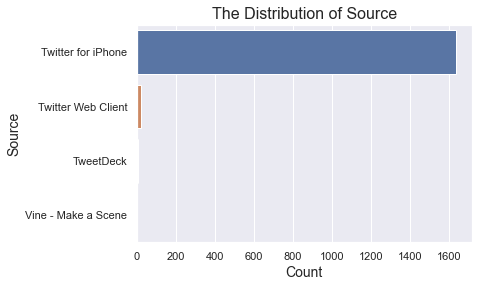

In [84]:
sns.countplot(data = twitter_archive, y = 'source', order = sorted_source)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

We can conclude that twiter from iphone was the highest tweet distribution source

### What is the most common dog stage?

In [85]:
#the most common dog stages
twitter_archive['dog_stage'].value_counts()

pupper           166
doggo             54
puppo             21
floofer            7
doggo-pupper       7
doggo-puppo        1
doggo-floofer      1
Name: dog_stage, dtype: int64

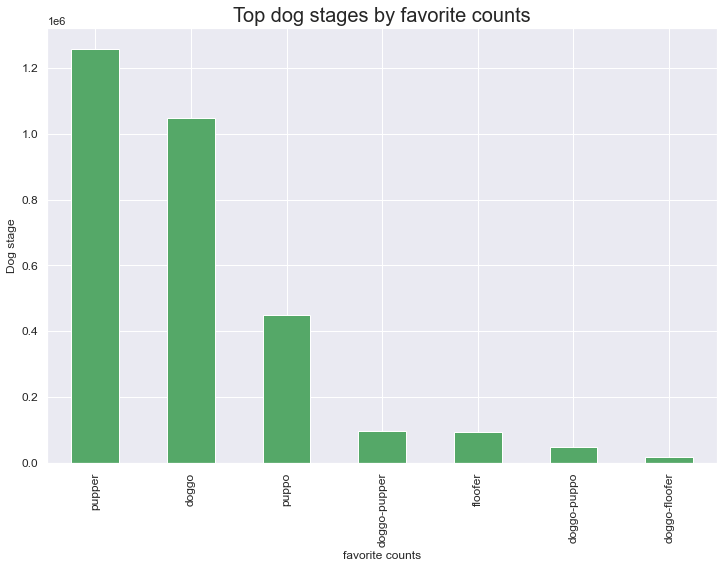

In [86]:
#plotting a bar chart to show top 5 dog breed by favorite counts
top_stage = twitter_archive.groupby('dog_stage')['favorite_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.title("Top dog stages by favorite counts", size=20)
top_stage.plot(kind='bar',fontsize=12,color='g')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

Pupper is topping the chats with respect to the most common dog stage

### What are the most common dog breeds?

In [87]:
# the most common dog breed
twitter_archive['dog_breed'].value_counts().head(5)

golden_retriever      156
Labrador_retriever    106
Pembroke               94
Chihuahua              90
pug                    62
Name: dog_breed, dtype: int64

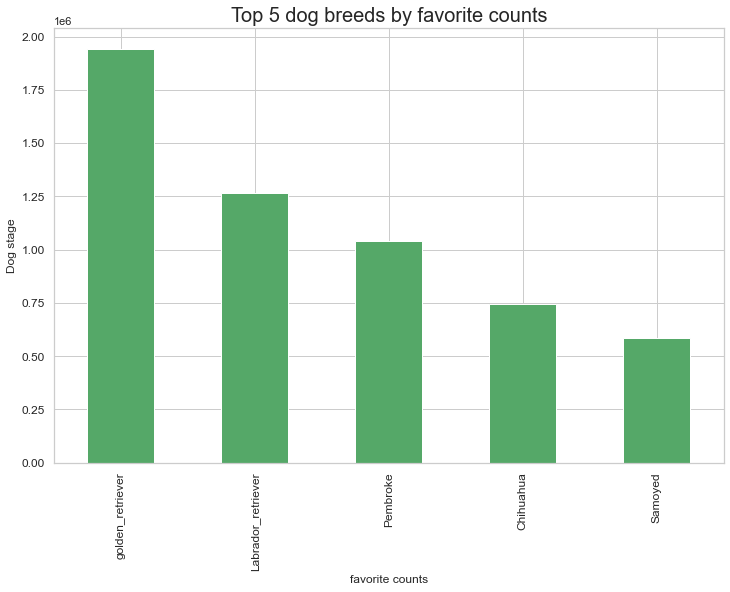

In [88]:
#plotting a bar chart to show top 5 dog breed by favorite counts
top_breed = twitter_archive.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=True).nlargest(5)
plt.figure(figsize=(12,8))
plt.title("Top 5 dog breeds by favorite counts", size=20)
top_breed.plot(kind='bar',fontsize=12,color='g')
plt.xlabel('favorite counts', fontsize=12)
plt.ylabel('Dog stage', fontsize=12);
sns.set_style("whitegrid");

golden_retriever had the highest value count, so it remains the most common dog breed.

### What is the correlation between retweet count and favorite count?

In [89]:
twitter_archive_clean.corr(method='pearson')

,retweet_count,favorite_count,img_num,confidence
retweet_count,1.000000,0.913284,0.095108,0.026994
favorite_count,0.913284,1.000000,0.126447,0.061550
img_num,0.095108,0.126447,1.000000,0.144230
confidence,0.026994,0.061550,0.144230,1.000000


`retweet_count` is positively correlates with `favorite_count` : r^2 = 0.759

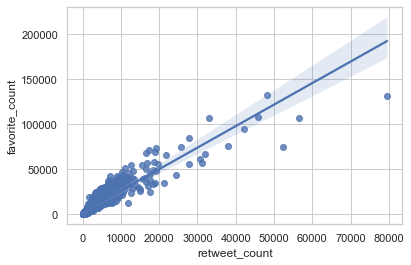

In [90]:
sns.regplot(x="retweet_count", y="favorite_count", data=twitter_archive);

### What is the change of retweets count and favorite count by time?

In [91]:
# The tweets time range
twitter_archive['timestamp'].min(), twitter_archive['timestamp'].max()

(Timestamp('2015-11-15 22:32:08'), Timestamp('2017-08-01 00:17:27'))

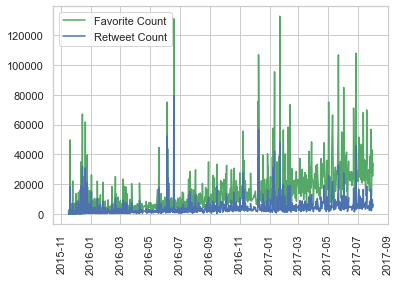

In [92]:
plt.plot(twitter_archive.timestamp, twitter_archive.favorite_count, color='g')
plt.plot(twitter_archive.timestamp, twitter_archive.retweet_count, color='b')
plt.legend([('Favorite Count'), ('Retweet Count')])
plt.xticks(rotation=90);

 It's clear that the favorite and retweet counts were increasing by time.